In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

In [102]:
schedule = pd.read_csv('sol_lt_500.tsv',delimiter='\t')
schedule['a*'] = schedule['a*'].apply(ast.literal_eval)
schedule['x'] = schedule['a*'].apply(lambda x: sum(x))


In [105]:
sum(schedule['x'] > 3)

84

In [78]:
int(schedule[(schedule['D']==1)&(schedule['T']==1)]['test'])

4

In [115]:
def plot_schedule_map(schedule):

    plt.figure(figsize=(11, 5))
    plt.title(f"Scheduled meetings")
    
    days = range(1,6)
    times = range(1,35)
    # Create a plot for each course
    for d in days:
        for t in times:
            meetings = sum((schedule['D']==1)&(schedule['T']==1)& (schedule['x']==4))
            if meetings == 1:
                plt.plot(t, d, 'bs', markersize=10)
            else:
                plt.plot(t, d, 'rs', markersize=10)
    plt.yticks(days, ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
    plt.xticks(times)
    plt.gca().invert_yaxis()
    plt.xlabel('Hour')
    plt.ylabel('Day of Week')
    plt.grid(True)
    plt.tight_layout()

    plt.show()

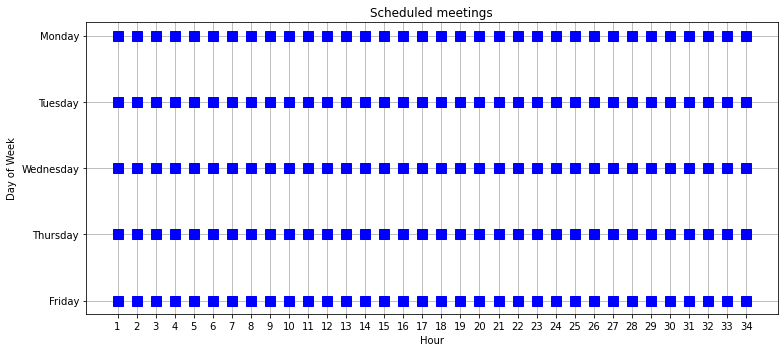

In [116]:
plot_schedule_map(schedule=schedule)